# Exploratory Data Analysis for Default Credit Card Dataset

Description of the Data.
* LIMIT_BAL: Amount of given credit in NT dollars
* SEX: Gender (1 = male, 2 = female)
* EDUCATION: Education level
    
    1 = graduate school

    2 = university

    3 = high school

    4 = others

    5, 6 = unknown
* MARRIAGE: Marital status (1 = married, 2 = single, 3 = others)
* AGE: Age in years
* PAY_0 to PAY_6: Repayment status from September to April 2005
    
    -1 = pay duly

    1 = payment delay for one month

    2 = payment delay for two months

    ...

    8 = delay for eight months

    9 = delay for nine months and above

* BILL_AMT1 to BILL_AMT6: Amount of bill statement from September to April 2005 (NT dollars)

* PAY_AMT1 to PAY_AMT6: Amount of previous payment from September to April 2005 (NT dollars)

* Y: Default payment (1 = yes, 0 = no)

In [160]:
#Import packages.
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Exploration

In [161]:
df = pd.read_csv('default.csv')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [162]:
df.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,50000,1,2,1,46,0,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [163]:
df.shape

(30000, 24)

We have 35 duplicate rows.

In [164]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 35


In [165]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


### 

* Pay_0 - Pay_6 min value -2 indicates 'no consumption', -1: 'paid in full', 0: 'the use of revolving credit' based on Kaggle discussion forum.
* negative amount of bill statement means overpayment --> but does this mean this amount becomes credit?

Categorical variabels; sex, education, and marriage. education and marriage have 0s.
What does this mean? Let's see the count for these undocumented labels.

Education: 
* 1 means graduate school
* 2 means university
* 3 means high school
* 4 means other and 0, 5, 6 are unknown --> we can combine 0, 4, 5, 6 into other.

Marriage: 
* 1 means married
* 2 means single
* 3 means other, and 0 is unknown -> we can combine 0 and 3 into other.

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [167]:
# Count for each category in SEX
sex_counts = df['SEX'].value_counts()
print("Counts for SEX:")
print(sex_counts)

# Count for each category in EDUCATION
education_counts = df['EDUCATION'].value_counts()
print("\nCounts for EDUCATION:")
print(education_counts)

# Count for each category in MARRIAGE
marriage_counts = df['MARRIAGE'].value_counts()
print("\nCounts for MARRIAGE:")
print(marriage_counts)

Counts for SEX:
SEX
2    18112
1    11888
Name: count, dtype: int64

Counts for EDUCATION:
EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

Counts for MARRIAGE:
MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


Summary: 30,000 rows, no null values, 35 dups, fix Education and Marriage for undocumented labels, rename Pay_0 with Pay_1 for consistency, (-2, -1, 0) values for pay_1.. pay_6 can be re-categorized as 'paid on time'.

### Data Cleaning

Let's remove dup values.

In [168]:
df = df.drop_duplicates()
print(f"Shape of dataframe after removing duplicates: {df.shape}")

Shape of dataframe after removing duplicates: (29965, 24)


Let's fix education & marriage.

In [169]:
df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 4)

education_counts = df['EDUCATION'].value_counts()
print("\nCounts for EDUCATION:")
print(education_counts)



Counts for EDUCATION:
EDUCATION
2    14019
1    10563
3     4915
4      468
Name: count, dtype: int64


In [170]:
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)

marriage_counts = df['MARRIAGE'].value_counts()
print("\nCounts for MARRIAGE:")
print(marriage_counts)


Counts for MARRIAGE:
MARRIAGE
2    15945
1    13643
3      377
Name: count, dtype: int64


Let's rename Pay_0 to Pay_1 for consistency.

In [171]:
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)

Let's re-categorize (-2,-1,0) as 0 representing 'paid on time'.

In [172]:
def replace_to_zero(col):
    fil = (df[col] == -2) | (df[col] == -1) | (df[col] == 0)
    df.loc[fil, col] = 0

for i in ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    replace_to_zero(i)


### Explatory Data Analysis

<Figure size 1000x600 with 0 Axes>

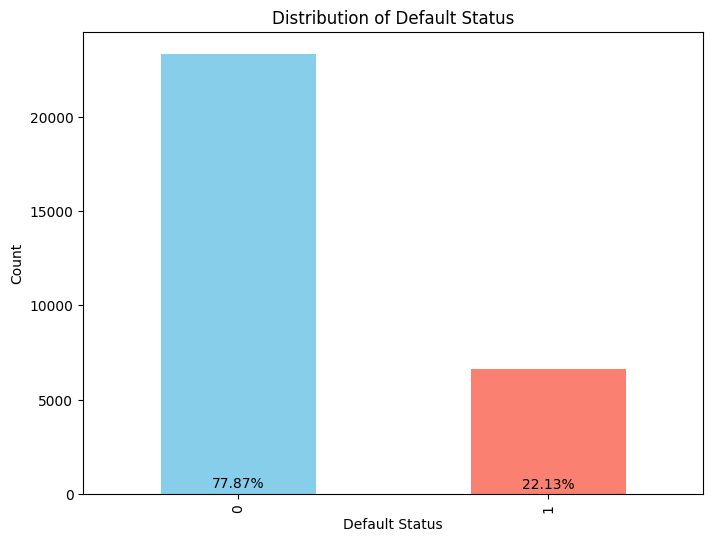

<Figure size 1000x600 with 0 Axes>

In [173]:
value_counts = df['Y'].value_counts()
total = value_counts.sum()
percentages = (value_counts / total) * 100

ax = value_counts.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'salmon'])
for i, count in enumerate(percentages):
    ax.text(i, count+100, f"{count:.2f}%", ha='center', va='bottom')

plt.title("Distribution of Default Status")
plt.xlabel("Default Status")
plt.ylabel("Count")
plt.figure(figsize=(10, 6))


22.13% for default.

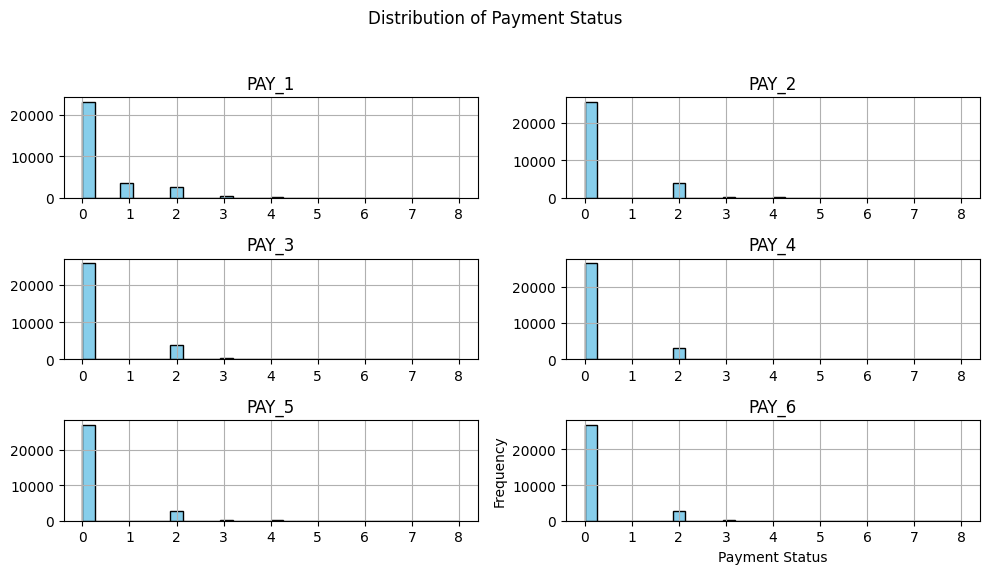

<function seaborn.categorical.countplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, stat='count', width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', ax=None, **kwargs)>

<Figure size 1000x600 with 0 Axes>

In [174]:
pay = df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
pay.hist(bins=30, figsize=(10, 6), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Payment Status")
plt.xlabel("Payment Status")
plt.ylabel("Frequency")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
plt.figure(figsize=(10, 6))
sns.countplot

Majority of people pay duly, but there are some delay for 2 months or so.

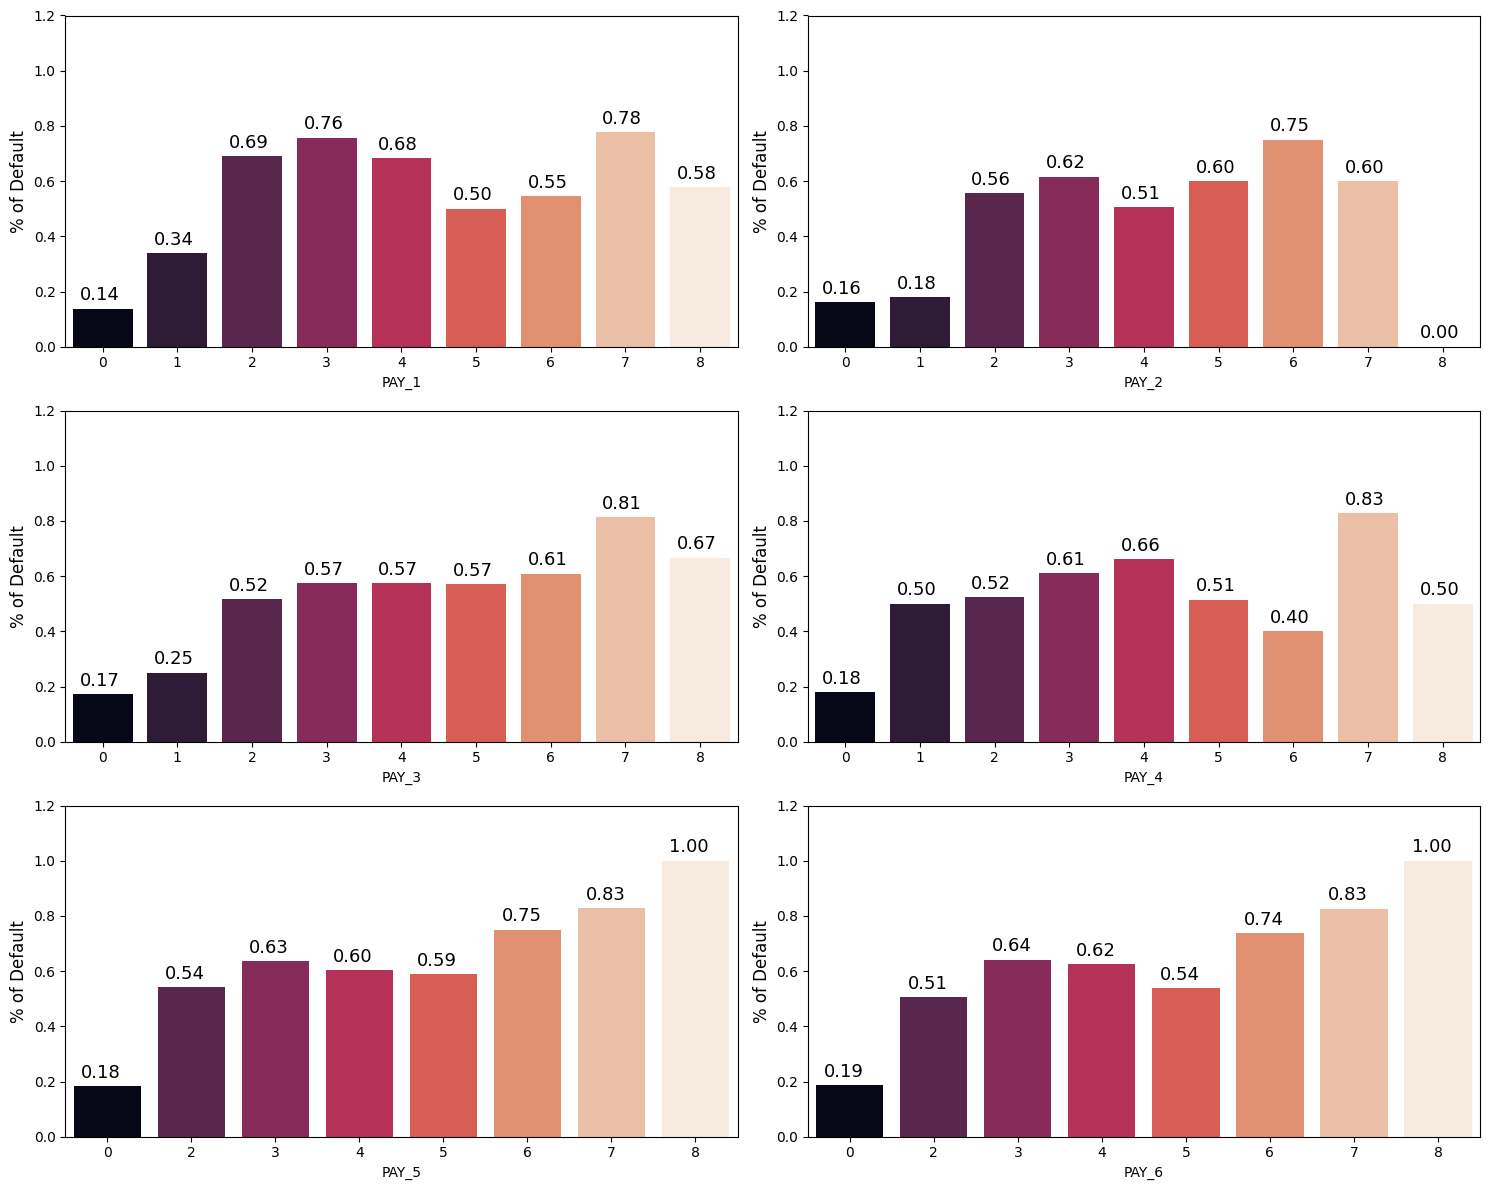

In [175]:
pay_x_fts = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Y", data = df, palette = 'rocket',hue=col, legend =False, errorbar = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,1.2)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.09, p.get_height()+0.03),fontsize=13)

plt.show()

Above shows default % for each value for repayment status. Delaying for 2+ months increases default %.

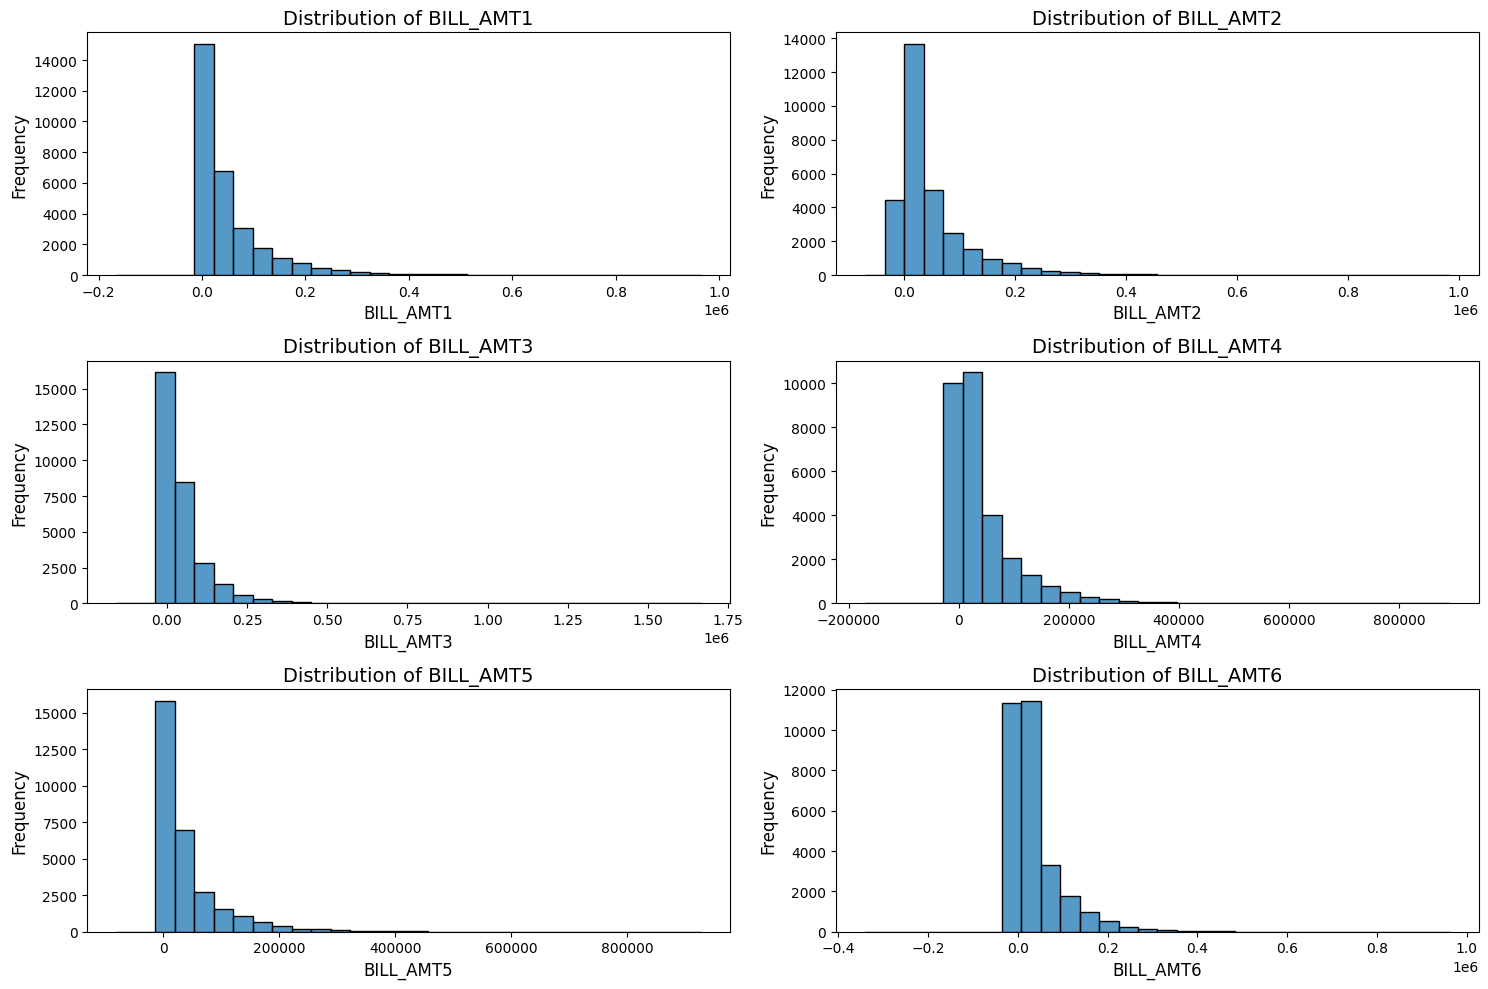

In [227]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(bill_pay_amt):
    plt.subplot(3,2,i+1)
    sns.histplot(data =df, x= col,bins =30)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

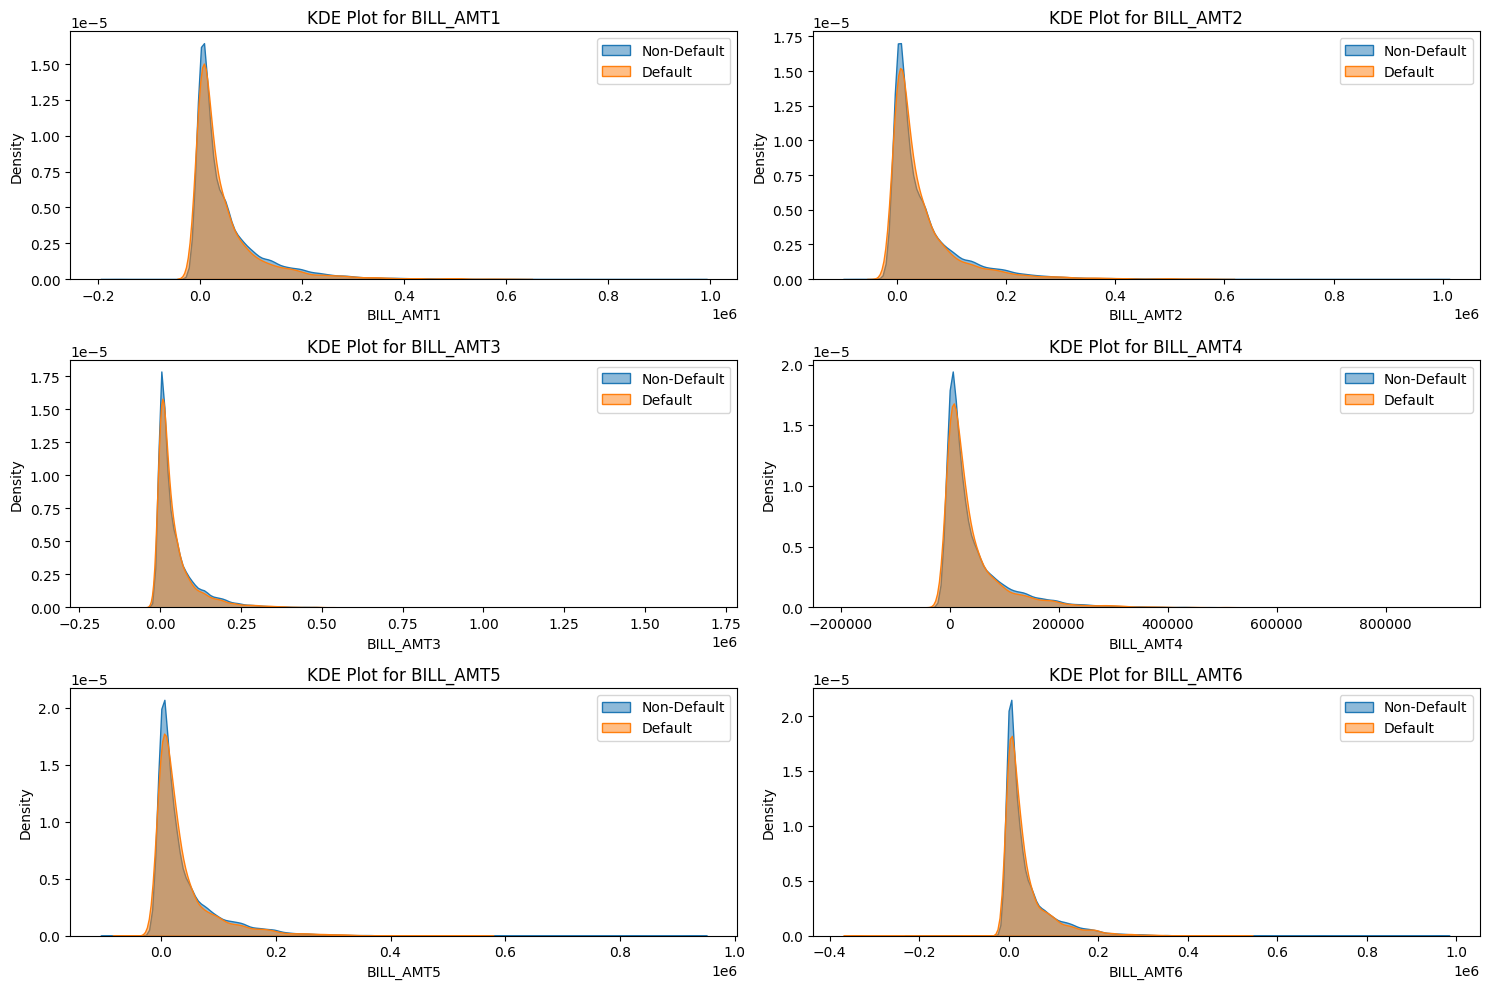

In [ ]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(bill_pay_amt):
    plt.subplot(3, 2, i + 1)
    sns.kdeplot(data=df[df['Y'] == 0], x=col, label='Non-Default', fill=True, alpha=0.5)
    sns.kdeplot(data=df[df['Y'] == 1], x=col, label='Default', fill=True, alpha=0.5)
    plt.title(f"KDE Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()

In [201]:
bins = [-350000, -1, 0, 25000, 75000, 200000, 2000000]

bill_bin_cols = ['BILL_AMT1_bins', 'BILL_AMT2_bins', 'BILL_AMT3_bins', 'BILL_AMT4_bins', 'BILL_AMT5_bins', 'BILL_AMT6_bins']

for i, col in enumerate(bill_pay_amt):
    df[bill_bin_cols[i]] = pd.cut(df[col], bins=bins, labels =['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], include_lowest=True)


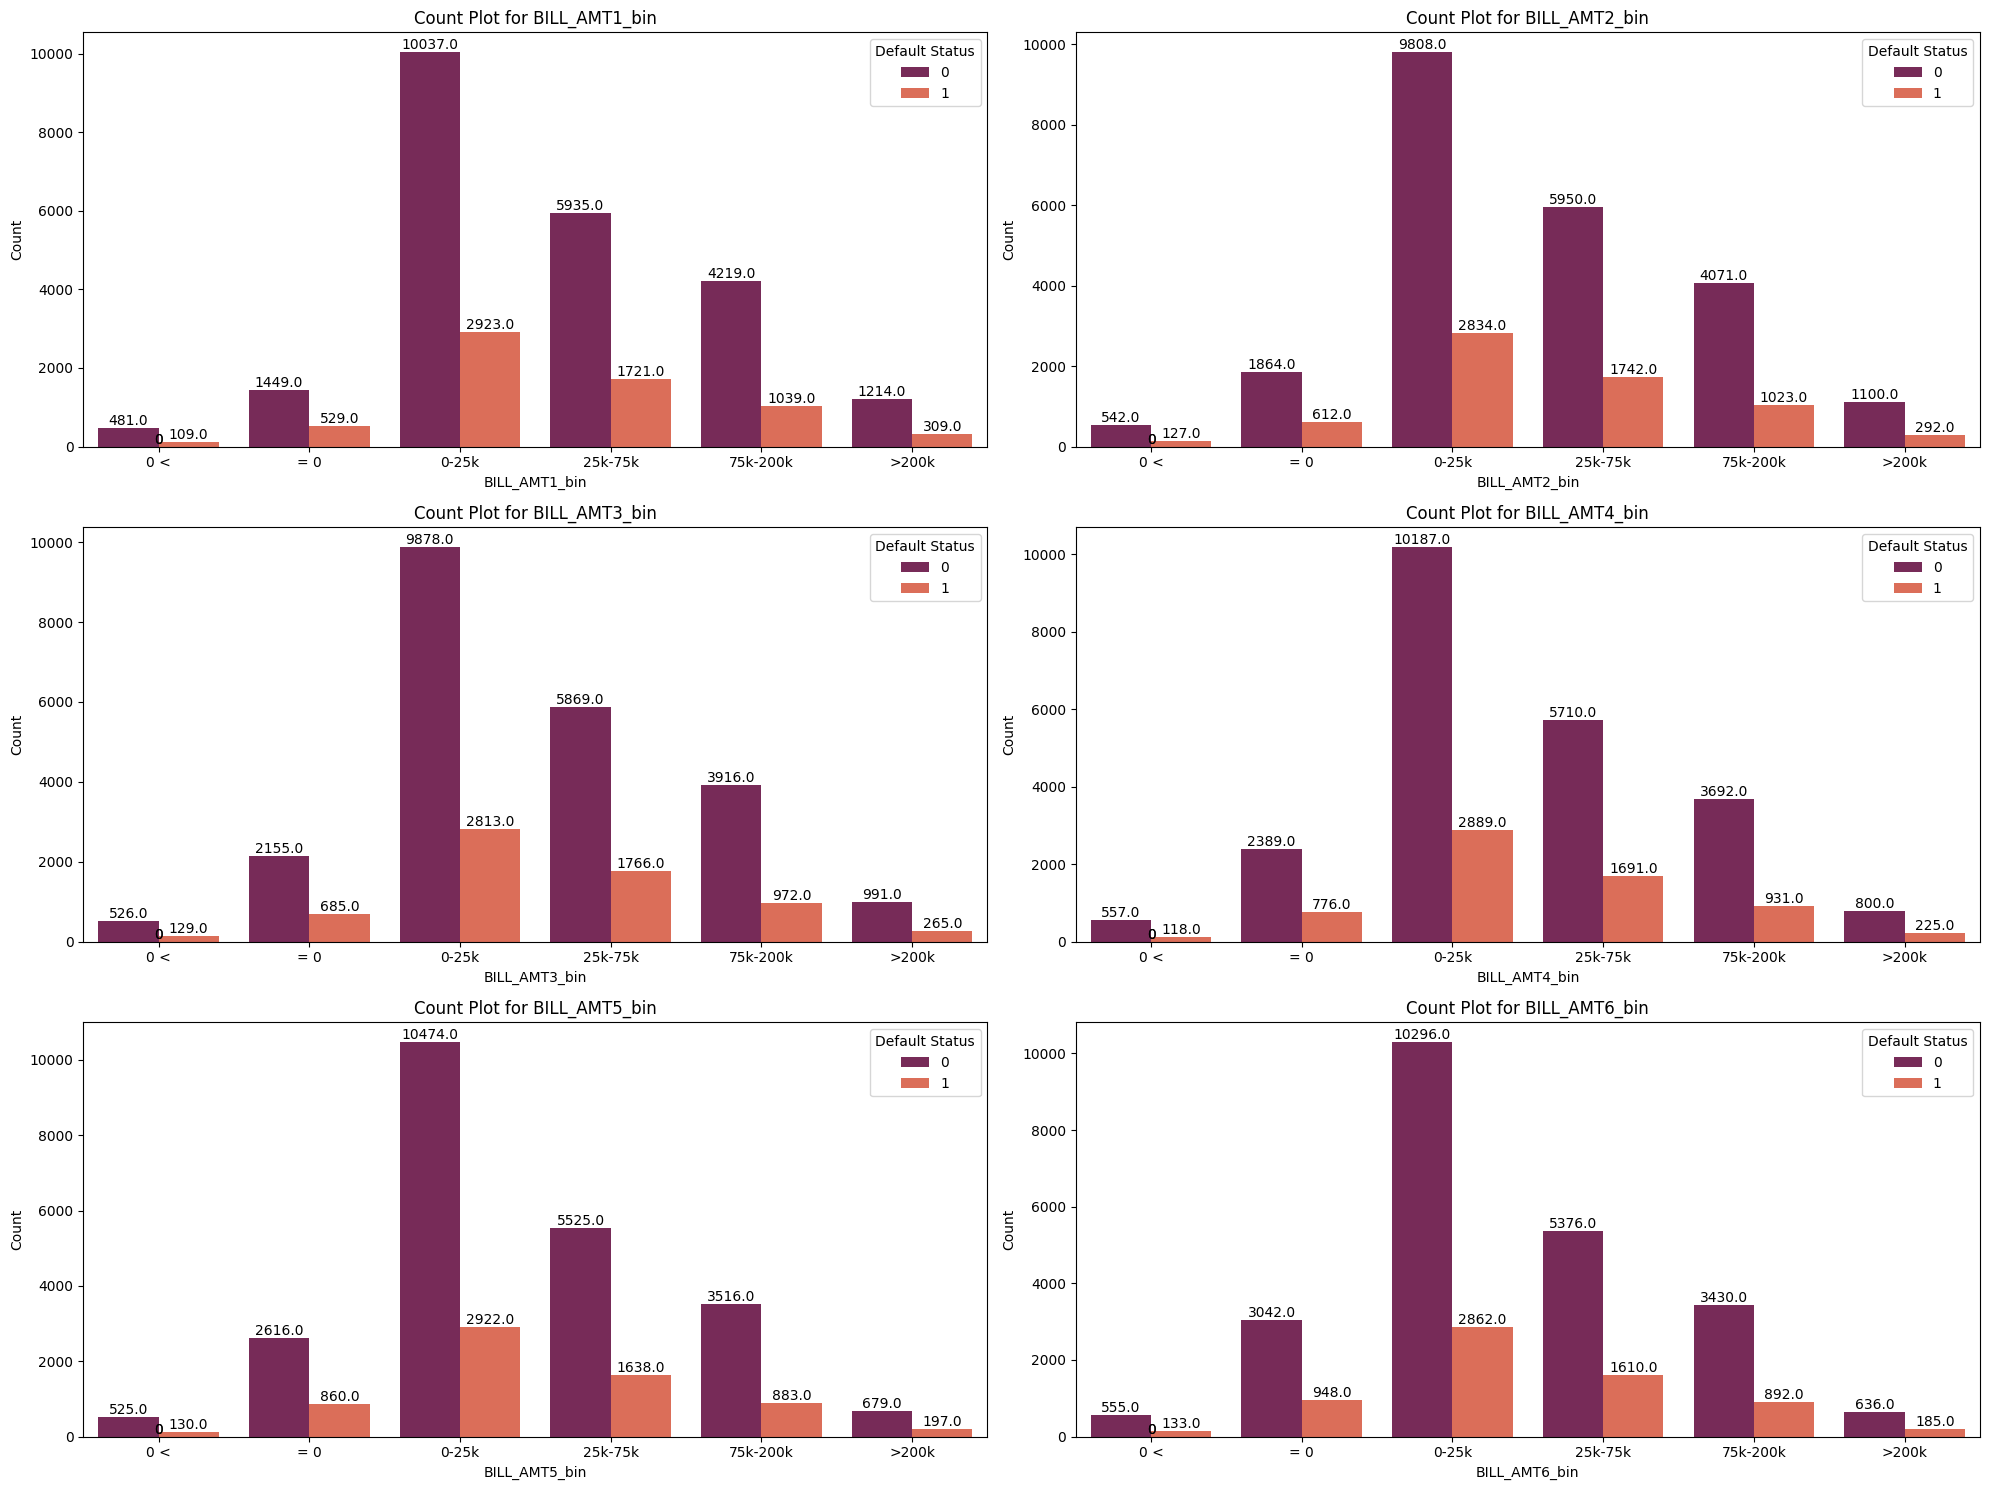

In [219]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(bill_amt_bins):
    plt.subplot(3,2,i+1)
    ax = sns.countplot(x=col, hue='Y', data=df, palette='rocket')
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.xticks([0,1,2,3,4,5], ['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'])
    plt.ylabel("Count")
    plt.legend(title='Default Status', loc='upper right')
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')
plt.show()
